# Python Image Library (Pillow)
La Python Image Library(*PIL*) est une bibliothèque de traitement des images utilisée pour appliquer des opérations simples sur les images. Néanmoins comme *PIL* n'est plus maintenue depuis 2009, un fork dénomé *PILLOW* a pris la place de la librairie originelle. 

Dans cette section, nous allons donc présenter les différentes possibilitées offertes par les librairies *PILLOW*.

Cette section est librement adaptée des tutoriels proposé par :
- http://pillow.readthedocs.io/en/3.2.x/handbook/tutorial.html

Cette section ne propose qu'une simple présentation des possibilités offertes par *PILLOW* et n'est bien évidement pas exhaustive. Par conséquent, nous vous renvoyons vers la documentation de *PILLOW* pour plus d'informations sur l'utilisation et les possibilités qu'offre la librairie :
- https://pypi.python.org/pypi/Pillow/

## 1.Opérations simple

Tout les codes de PILLOW sont contenus dans `PIL`. 

Commençons par inclure les fonctions liées au traitement des images.

In [1]:
from PIL import Image

L'ouverture d'une image se fait par la commande :

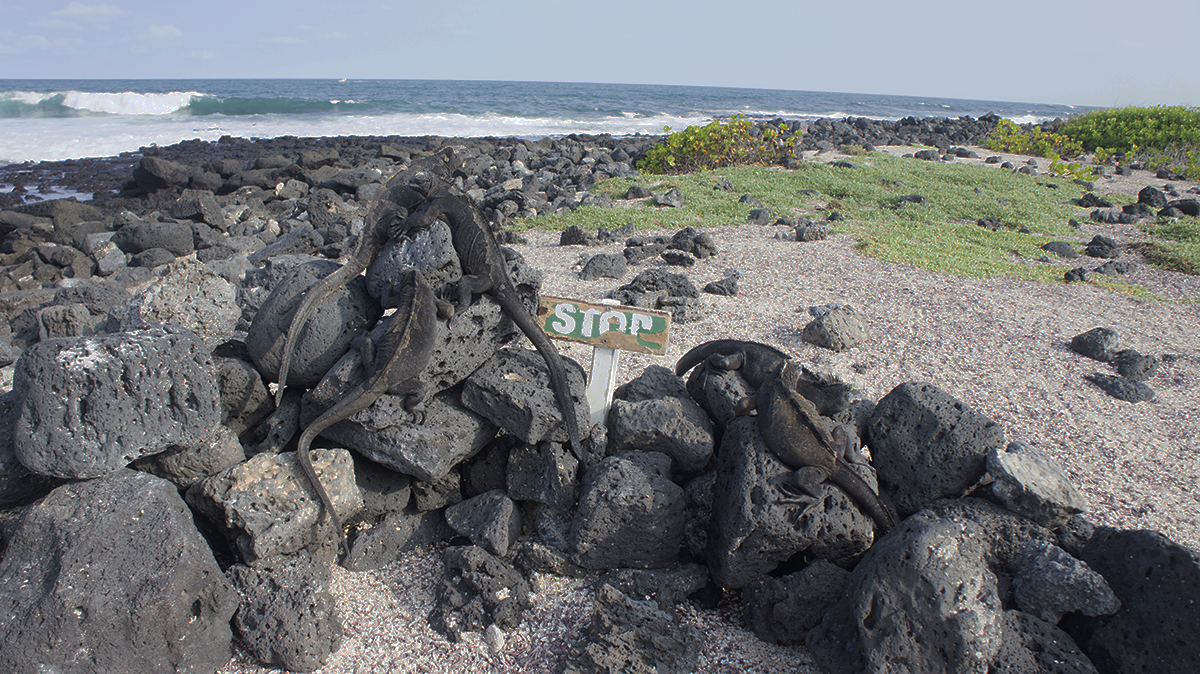

In [2]:
im = Image.open('exo_img/pillow/input/iguanes.png')
im

L'image est définie par un type propre à **PILLOW**

In [3]:
print(type(im))
print(im.format, im.size, im.mode)

<class 'PIL.PngImagePlugin.PngImageFile'>
('PNG', (1200, 674), 'RGB')


Pour accéder à l'image il est donc nécessaire d'utiliser les getter/setter de *PILLOW*.

Il est possible d'accéder à la valeur d'un pixel par la fonction `getpixel`:

In [4]:
# Sous forme de tuple
rgb = im.getpixel((3,10))

print('La couleur du pixel (3, 10) est : %s' %(rgb, ))

La couleur du pixel (3, 10) est : (173, 184, 212)


In [5]:
# En séparant les cannaux
r, g, b = im.getpixel((3,10))

print('Le niveau de rouge du pixel (3, 10) vaut : %d' %r)

Le niveau de rouge du pixel (3, 10) vaut : 173


Pour définir la valeur d'un pixel, il est nécessaire d'utiliser la fonction `putpixel`:

In [6]:
print('Valeur du pixel avant utilisation du setter : %s' %(im.getpixel((3,10)), ))

im.putpixel((3, 10), (30, 200, 100))

print('Valeur du pixel après utilisation du setter : %s' %(im.getpixel((3,10)), ))


Valeur du pixel avant utilisation du setter : (173, 184, 212)
Valeur du pixel après utilisation du setter : (30, 200, 100)


### EXERCICE : 
Remplissez la fonction `draw_X` de sorte à ce qu'elle dessine une croix blanche de 100px de large sur l'image. 
Le point `pos` correspond au coin supérieur gauche de la croix :

In [7]:
def draw_X(im, pos):
    """Draw an X of size 100px.
    
    Parameters
    ----------
    im : pillow image
    
    pos : tuple,
        Position of the superior left corner.
        
    Return
    ------
    im_out : pillow image
        Copy of `im` with a white cross ap the position `pos`
    """
    length, width = im.size
    im = im.copy()
    
    # Prmemière branche
    for x, y in zip(range(pos[0], pos[0] + 101), 
                    range(pos[1], pos[1] + 101)):
        if x >= length or x < 0 or y < 0 or y >= width:
            continue
        im.putpixel((x, y), (255, 255, 255))
        
    # Deuxième branche
    for x, y in zip(range(pos[0] + 100, pos[0] -1 , -1), 
                    range(pos[1], pos[1] + 101)):
        if x >= length or y >= width:
            continue
        im.putpixel((x, y), (255, 255, 255))        
    
    return im

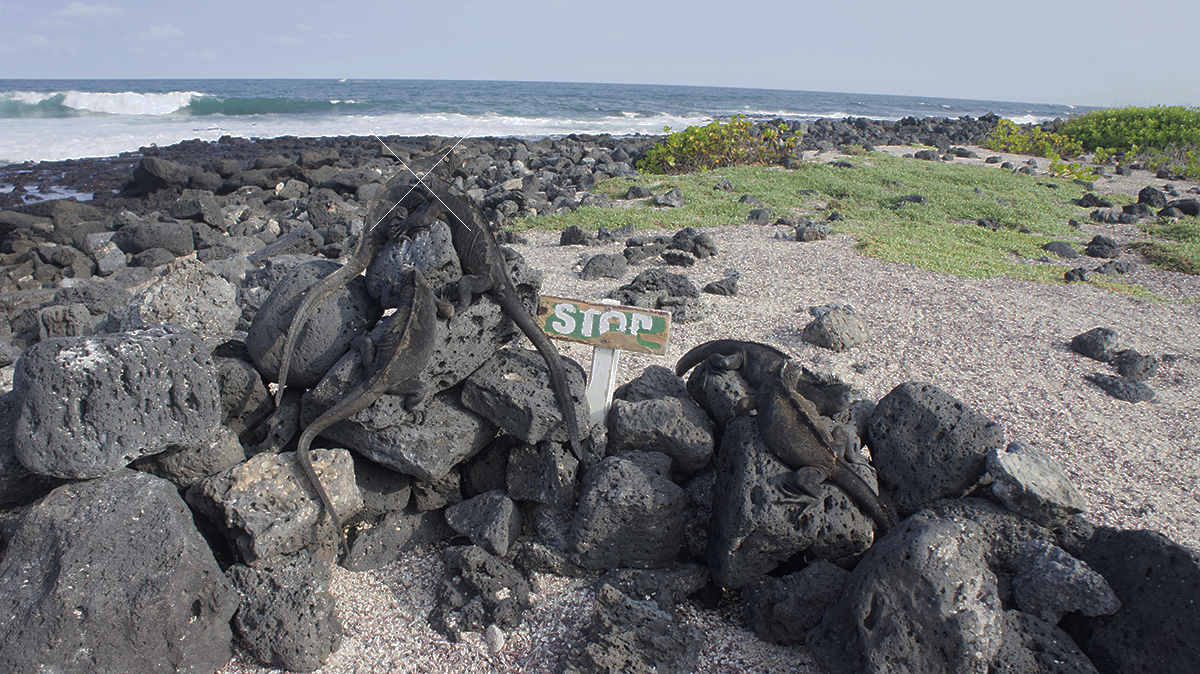

In [8]:
draw_X(im, (370, 130))

La fonction `save` permet de sauver l'image:

In [9]:
draw_X(im, (370, 130)).save('exo_img/pillow/input/iguanes_with_cross.jpg')

## 1.2 Transformations
En plus des opérations basiques de lecture/écriture/accés, *PILLOW* offre la possibilité d'effectuer un certain nombre de traitement simples. Commençons par appliquer quelques transformation affines.

Il est possible de définir des vignettes d'une image avec la fonction `thumbnail`:

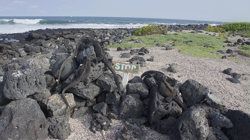

In [10]:
im = Image.open('exo_img/pillow/input/iguanes.png')
im.thumbnail((250, 250))
im

Si néanmoins, on souhaite redimensionner l'image sans vouloir conserver les proportions de l'images, il vaut mieux utiliser la fonction `resize`:

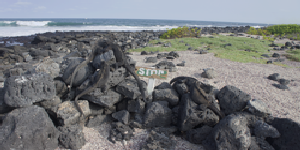

In [11]:
im.resize((300, 150))

La fonction `crop` permet de recadrer l'image:

In [12]:
im.crop?

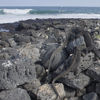

In [13]:
# X0_pos, Y0_pos, X1_pos, Y1_pos
im.crop((10, 10, 110, 110))


`transpose` permet d'appliquer certaine transformations basique:

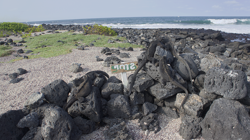

In [14]:
im.transpose(Image.FLIP_LEFT_RIGHT)

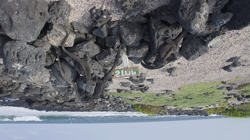

In [15]:
im.transpose(Image.FLIP_TOP_BOTTOM)

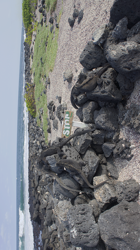

In [16]:
im.transpose(Image.ROTATE_90)

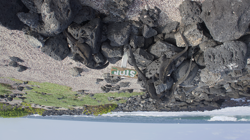

In [17]:
im.transpose(Image.ROTATE_180)

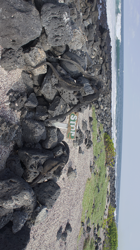

In [18]:
im.transpose(Image.ROTATE_270)

Pour appliquer une rotation plus précision, il suffit d'utiliser la fonction `rotate`. Attention l'angle passer en paramètre est dans le sens anti-horaire :

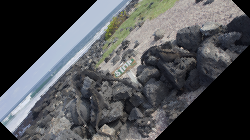

In [19]:
im.rotate(45) # angle dé

La fonction `convert` permet de convertir le format de l'image.

In [20]:
im.convert?

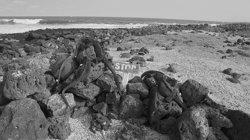

In [21]:
#im.convert("CMYK")
im.convert("L")

## 1.3 Filtrage
**Pillow** offre également des fonctions de retouche et de filtrage. Ces dernières sont contenues dans le module `Pil.ImageFilter`:

In [22]:
from PIL import ImageFilter

Certains de ces filtres sont prédéfinis:

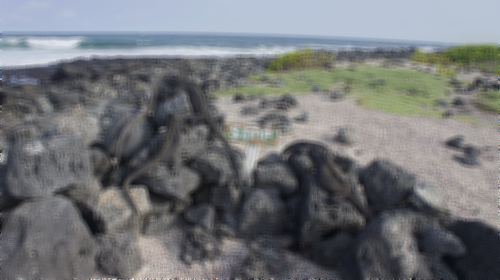

In [25]:
im = Image.open('exo_img/pillow/input/iguanes.png')
im.thumbnail((500, 500))
im.filter(ImageFilter.BLUR)

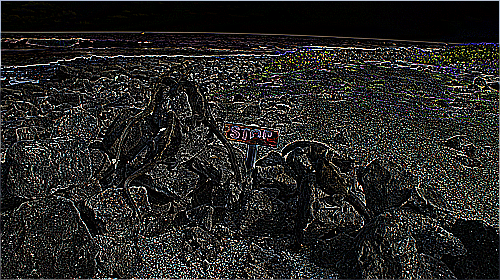

In [26]:
im.filter(ImageFilter.FIND_EDGES)

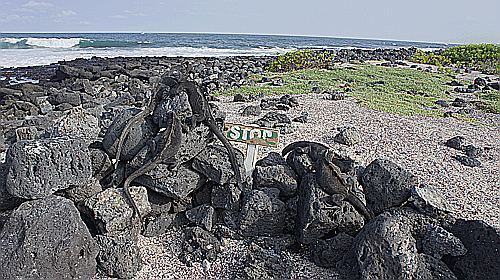

In [27]:
im.filter(ImageFilter.EDGE_ENHANCE)

D'autres sont paramétrables :

In [28]:
ImageFilter.GaussianBlur?

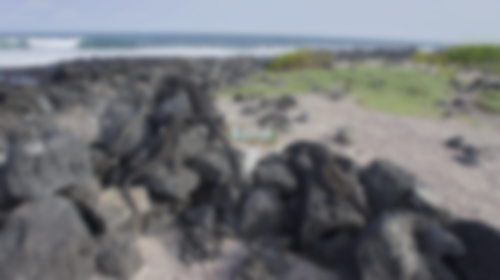

In [29]:
im.filter(ImageFilter.GaussianBlur(radius=3))

In [30]:
ImageFilter.MedianFilter?

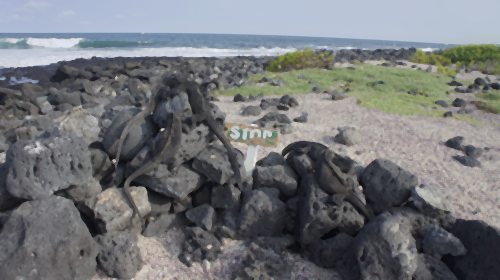

In [31]:
im.filter(ImageFilter.MedianFilter(size=3))

### EXERCICE
Le module `ImageFilter` offre une fonction `Kernel` qui permet de définir son propre filtre à appliquer sur l'image. A partir de la fonction ImageFilter.Kernel créér un détecteur de contour horizontaux.

In [32]:
ImageFilter.Kernel?

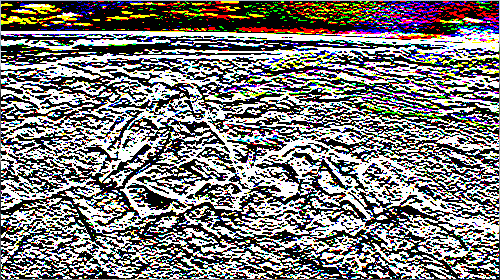

In [33]:
width, length = 3,3
kernel = -1., -1., -1., 0., 0., 0., 1., 1., 1.
im.filter(ImageFilter.Kernel(size=(width, length), kernel=kernel))

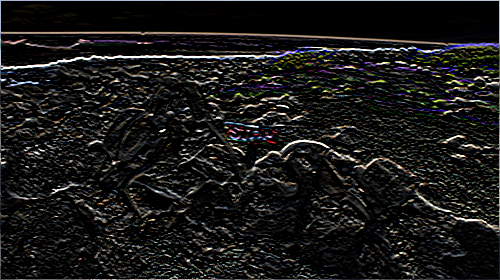

In [34]:
width, length = 3,3
kernel = -1., -1., -1., 0., 0., 0., 1., 1., 1.
im.filter(ImageFilter.Kernel(size=(width, length), kernel=kernel, scale=1.))

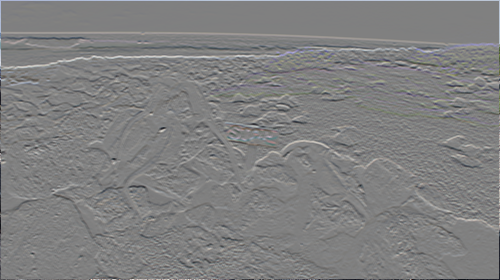

In [35]:
width, length = 3,3
kernel = -1., -1., -1., 0., 0., 0., 1., 1., 1.
im.filter(ImageFilter.Kernel(size=(width, length), kernel=kernel, scale=6., offset=128))

## 1.4 Retouche des images
Le module `PIL.ImageEnhance` propose un certain nombre de function de retouche des image:

In [36]:
from PIL import ImageEnhance

Le module propose un certain nombre de traitement classique:

In [37]:
color_enhancer = ImageEnhance.Color(im)

In [38]:
type(color_enhancer)

PIL.ImageEnhance.Color

In [39]:
color_enhancer.enhance?

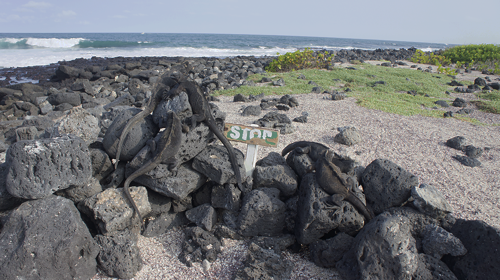

In [40]:
color_enhancer.enhance(1.)

In [41]:
contrast_enhancer = ImageEnhance.Contrast(im)
contrast_enhancer.enhance?

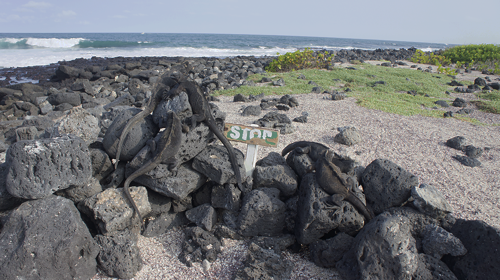

In [42]:
ImageEnhance.Contrast(im).enhance(1.)

In [43]:
brightness_enhancer = ImageEnhance.Brightness
brightness_enhancer?

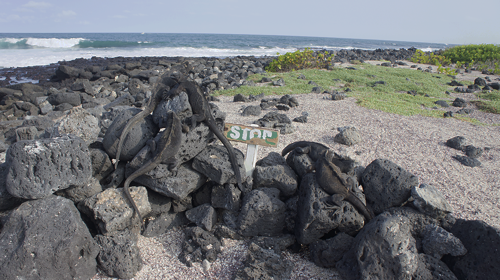

In [44]:
ImageEnhance.Brightness(im).enhance(1.)

Pour définir un traitement plus spécifique il est possible d'utiliser la fonction `point`:

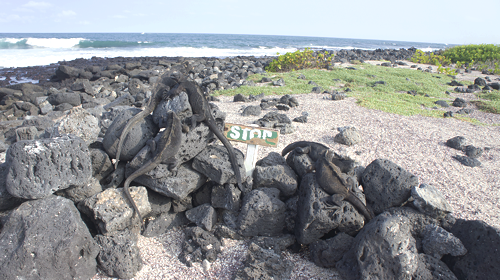

In [45]:
im.point(lambda i: i * 1.2 + 10)

### 1.5 EXERCICE : Script d'automatisation
Nous vous proposons de définir un script d'automatisation du traitement des images.

Commençons par définir le traitement à appliquer à chacune des images :
- Créer une vignette de l'image d'origine pour qu'elle est une taille max de 500x500
- le niveau de vert des pixel dont la valeur rouge est < 100 est multiplié par un facteur 0.7

Pour ce faire, il faudra définir un masque de l'image en utilisant la fonction `point`.
Vous aurez également besoin des fonctions `split`, `paste` et `merge`.


In [46]:
def apply_treatment(im):
    im.thumbnail((500, 500))
    source = im.split()
    R, G, B = 0, 1, 2

    # select regions where red is less than 100
    mask = source[R].point(lambda i: i < 100 and 255)

    # process the green band
    out = source[G].point(lambda i: i * 0.7)

    # paste the processed band back, but only where red was < 100
    source[G].paste(out, None, mask)

    # build a new multiband image
    return Image.merge(im.mode, source)

Nous vous proposons de vérifier le traitement sur une seule image pour le moment:

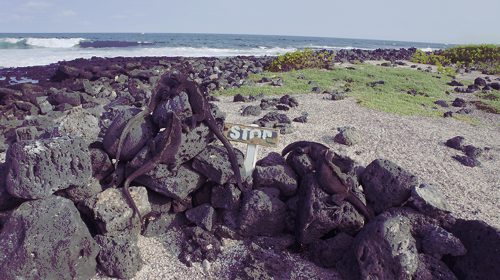

In [47]:
apply_treatment(im)

**Bonus**: Les modules `glob` et `os` fournissent tout ce qu'il faut pour créer de nouveau répertoire et extraite le nom d'un fichier. À partir de ces modules, appliquer le traitement de la fonction `apply_treatment` à l'ensemble de photos contenues dans le répertoire `exo_img/pillow/input` et sauver chaque nouvelle image dans le répertoire `exo_img/pillow/thumbnails`.

In [48]:
import glob
import os
from PIL import Image

# Creation du repertoire s'il n'existe pas encore
if not os.path.exists('exo_img/pillow/thumbnails'):
    os.makedirs('exo_img/pillow/thumbnails')
    
# Liste toute les images dans le repertoire
for filename in glob.glob("exo_img/pillow/input/*"):
    # Lecture de l'image
    print("Reading input image: %s" % filename)
    im_orig = Image.open(filename)
    
    # Modification de l'image d'origine
    im = apply_treatment(im_orig)
    
    # Extraction
    basename = os.path.basename(filename)
    filename = os.path.splitext(basename)[0]
    thumb_filename = "exo_img/pillow/thumbnails/%s.png" % filename
    
    # Enregistrement de l'image avec le même nom au format png 
    print("Save modified image: %s" % thumb_filename)
    im.save(thumb_filename)

Reading input image: exo_img/pillow/input/iguanes_with_cross.jpg
Save modified image: exo_img/pillow/thumbnails/iguanes_with_cross.png
Reading input image: exo_img/pillow/input/salta_1.png
Save modified image: exo_img/pillow/thumbnails/salta_1.png
Reading input image: exo_img/pillow/input/iguanes.png
Save modified image: exo_img/pillow/thumbnails/iguanes.png
Reading input image: exo_img/pillow/input/salta_2.png
Save modified image: exo_img/pillow/thumbnails/salta_2.png
